<a href="https://colab.research.google.com/github/Maxim687/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_5_%D0%A2%D0%B8%D0%BC%D0%BE%D1%89%D1%83%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
x = iris.data

pd.DataFrame(x, columns = iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df = pd.DataFrame(x, columns=iris.feature_names)
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

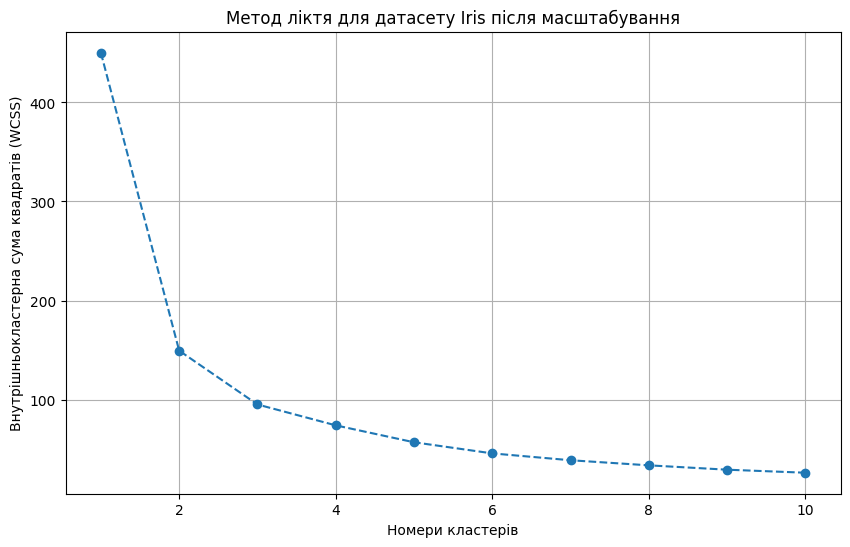

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

X_2d = pd.DataFrame(X_scaled, columns=iris.feature_names).iloc[:, 1:]

wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_2d)
    wcss_2d.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss_2d, marker = 'o', linestyle = '--')
plt.title('Метод ліктя для датасету Iris після масштабування')
plt.xlabel('Номери кластерів')
plt.ylabel('Внутрішньокластерна сума квадратів (WCSS)')
plt.grid(True)
plt.show()

Оптимальна кількість кластерів - 2.

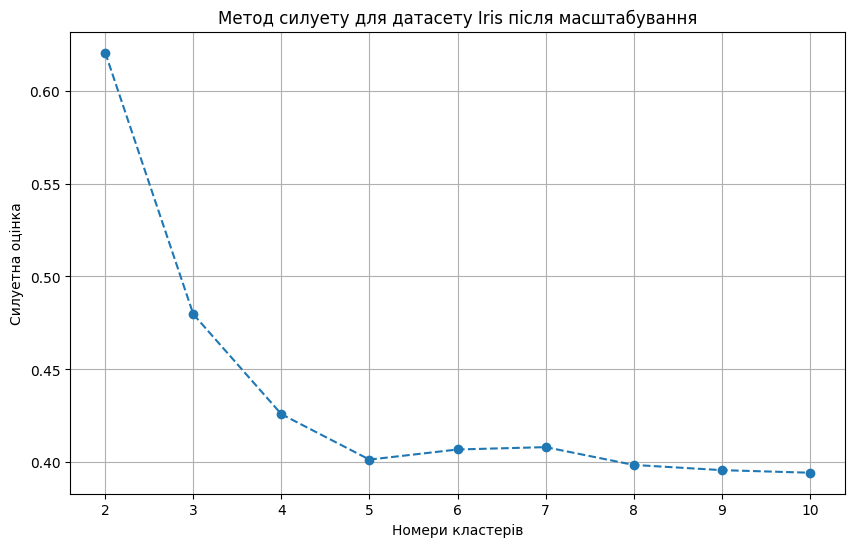

In [ ]:
silhouette_scores = []
for i in range (2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    cluster_labels = kmeans.fit_predict(X_2d)
    silhouette_avg = silhouette_score(X_2d, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle = '--')
plt.title('Метод силуету для датасету Iris після масштабування')
plt.xlabel('Номери кластерів')
plt.ylabel('Силуетна оцінка')
plt.grid(True)
plt.show()

Оптимальна кількість кластерів - 2(там де максимум).

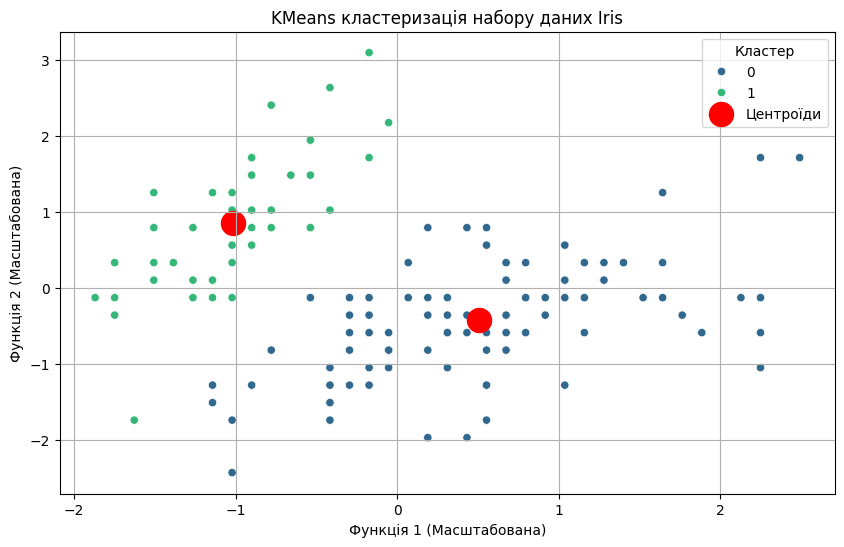

In [ ]:
import seaborn as sns
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize = (10, 6))
sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue = clusters, palette = 'viridis', legend = 'full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Центроїди')
plt.title('KMeans кластеризація набору даних Iris')
plt.xlabel('Функція 1 (Масштабована)')
plt.ylabel('Функція 2 (Масштабована)')
plt.legend(title = 'Кластер')
plt.grid(True)
plt.show()

Висновок

Оптимальна кількість кластерів 2, а датасет Ірис містить інформацію про 3 види ірисів.

Метод ліктя допомагає визначити оптимальну кількість кластерів, але він не завжди пов’язаний з реальними класами даних. В даному випадку, він виявив, що 2 кластери є оптимальною кількістю для набору даних, враховуючи внутрішньокластерну варіабельність. Однак це не означає, що ці 2 кластери точно відповідають реальним видам ірисів.